In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 3s 7ms/step - loss: 0.6034 - accuracy: 0.8136 - val_loss: 0.2780 - val_accuracy: 0.9153
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 0.2497 - accuracy: 0.9224 - val_loss: 0.1777 - val_accuracy: 0.9463
Epoch 1/2
375/375 [==============================] - 3s 7ms/step - loss: 0.2883 - accuracy: 0.9167 - val_loss: 0.1491 - val_accuracy: 0.9582
Epoch 2/2
375/375 [==============================] - 2s 6ms/step - loss: 0.1215 - accuracy: 0.9644 - val_loss: 0.1135 - val_accuracy: 0.9654


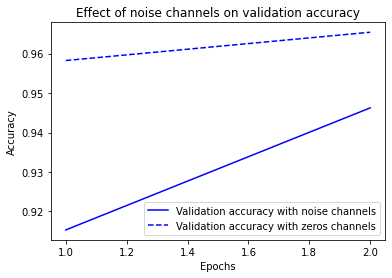

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1,3)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 5ms/step - loss: 2.3169 - accuracy: 0.1037 - val_loss: 2.3063 - val_accuracy: 0.1010
Epoch 2/2
375/375 [==============================] - 2s 5ms/step - loss: 2.3002 - accuracy: 0.1158 - val_loss: 2.3097 - val_accuracy: 0.1024


In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 5ms/step - loss: 695.2770 - accuracy: 0.3237 - val_loss: 3.6878 - val_accuracy: 0.2085
Epoch 2/2
375/375 [==============================] - 2s 4ms/step - loss: 3.9966 - accuracy: 0.2320 - val_loss: 2.3982 - val_accuracy: 0.2659


In [11]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=2,
          batch_size=128,
          validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 2s 5ms/step - loss: 0.4098 - accuracy: 0.9080 - val_loss: 0.1439 - val_accuracy: 0.9616
Epoch 2/2
375/375 [==============================] - 2s 5ms/step - loss: 0.1445 - accuracy: 0.9635 - val_loss: 0.1748 - val_accuracy: 0.9606


In [12]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 1ms/step - loss: 0.6734 - accuracy: 0.8308 - val_loss: 0.3590 - val_accuracy: 0.9021
Epoch 2/2
375/375 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.9035 - val_loss: 0.3077 - val_accuracy: 0.9127


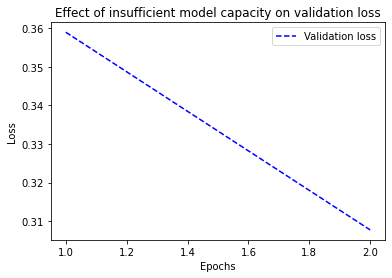

In [13]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1,3)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [14]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=2,
    batch_size=128,
    validation_split=0.2)

Epoch 1/2
375/375 [==============================] - 1s 2ms/step - loss: 0.3572 - accuracy: 0.8991 - val_loss: 0.1765 - val_accuracy: 0.9477
Epoch 2/2
375/375 [==============================] - 1s 2ms/step - loss: 0.1575 - accuracy: 0.9526 - val_loss: 0.1379 - val_accuracy: 0.9610


In [15]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 2s 22ms/step - loss: 0.5242 - accuracy: 0.7903 - val_loss: 0.3950 - val_accuracy: 0.8761
Epoch 2/2
30/30 [==============================] - 0s 10ms/step - loss: 0.3181 - accuracy: 0.9011 - val_loss: 0.3089 - val_accuracy: 0.8851


In [16]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 20ms/step - loss: 0.5950 - accuracy: 0.7773 - val_loss: 0.5131 - val_accuracy: 0.8462
Epoch 2/2
30/30 [==============================] - 0s 11ms/step - loss: 0.4456 - accuracy: 0.8831 - val_loss: 0.4139 - val_accuracy: 0.8735


In [17]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 3s 70ms/step - loss: 0.5540 - accuracy: 0.7445 - val_loss: 0.3246 - val_accuracy: 0.8829
Epoch 2/2
30/30 [==============================] - 2s 60ms/step - loss: 0.2399 - accuracy: 0.9070 - val_loss: 0.4439 - val_accuracy: 0.8313


In [18]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 25ms/step - loss: 0.6077 - accuracy: 0.7623 - val_loss: 0.5070 - val_accuracy: 0.8347
Epoch 2/2
30/30 [==============================] - 0s 12ms/step - loss: 0.3978 - accuracy: 0.8939 - val_loss: 0.4331 - val_accuracy: 0.8561


In [19]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=2, batch_size=512, validation_split=0.4)

Epoch 1/2
30/30 [==============================] - 1s 23ms/step - loss: 0.6513 - accuracy: 0.6124 - val_loss: 0.5630 - val_accuracy: 0.8383
Epoch 2/2
30/30 [==============================] - 0s 15ms/step - loss: 0.5449 - accuracy: 0.7459 - val_loss: 0.4485 - val_accuracy: 0.8596
